# Exploratory Data Analyis for a Bank Telemarketing Campaigns

by Ankush Brella

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset

df = pd.read_csv("C:\\Users\\91982\\Downloads\\bank_marketing_updated_v1.csv", low_memory=False, header =2)

In [3]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


## Data Preparation:

In [5]:
#Splitting the jobedu column into separate columns for job and education

df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)
df.drop(columns=['jobedu'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45161 non-null  object 
 12  duration    45211 non-null  object 
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  response    45181 non-null  object 
 18  job         45211 non-null  object 
 19  education   45211 non-nul

In [7]:
#Checking the missing values

df.isna().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [8]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
# Fetching month from the month column that includes year also

df["month"] = pd.to_datetime(df["month"]).dt.month

C:\Users\91982\AppData\Local\Temp\ipykernel_11560\2364686585.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["month"] = pd.to_datetime(df["month"]).dt.month


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45161 non-null  float64
 12  duration    45211 non-null  object 
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  response    45181 non-null  object 
 18  job         45211 non-null  object 
 19  education   45211 non-nul

In [11]:
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,5.0,261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,5.0,151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,5.0,76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,5.0,92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,5.0,198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,11.0,16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,11.0,7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,11.0,18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,11.0,8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [12]:
# Converting unit of the duration into minutes

def convert_to_minutes(duration):
        if 'min' in duration:
            return float(duration.split()[0])
        elif 'sec' in duration:
            return float(duration.split()[0]) / 60
        else:
            return None  # Handle other cases if needed

# Apply the conversion function to the 'duration' column
df['duration'] = df['duration'].apply(convert_to_minutes)
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,5.0,4.350000,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,5.0,2.516667,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,5.0,1.266667,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,5.0,1.533333,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,5.0,3.300000,1,-1,0,unknown,no,unknown,unknown


## Understanding the Data

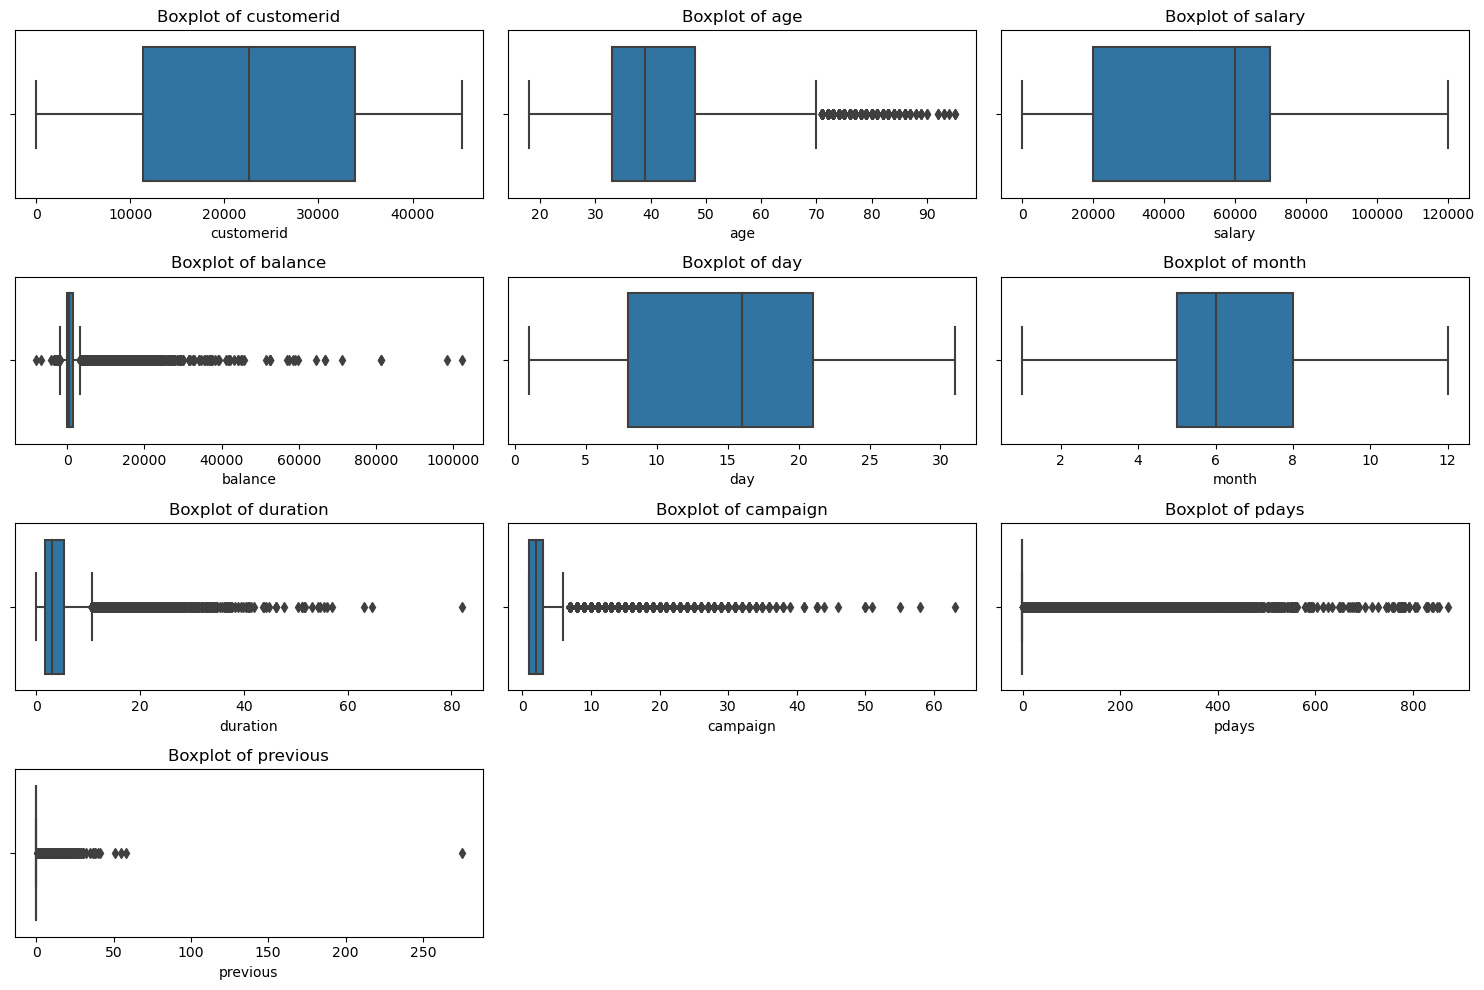

In [13]:
# Checking for the outliers
# Select numeric columns for univariate outlier detection

numeric_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numeric column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

- In this case we can see there are a lot of outliers in the columns such as duration and balance 

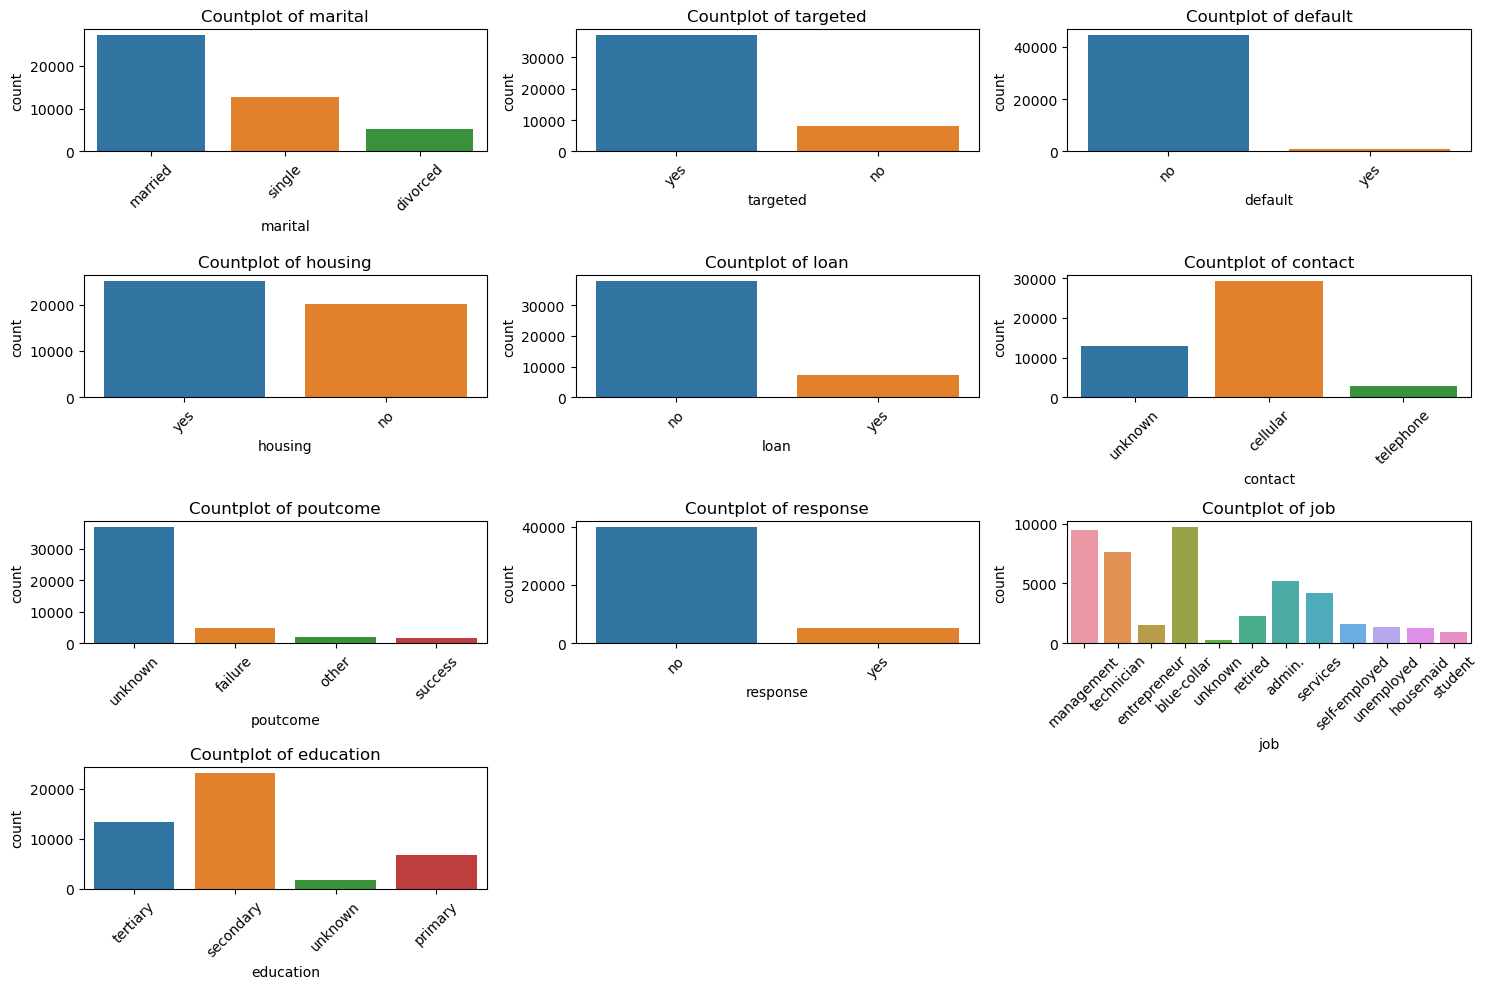

In [14]:
# 
# Select categorical columns for visualization
categorical_cols = df.select_dtypes(include='object').columns

# Create count plots for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Filling of the missing values

In [15]:
df.isna().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [16]:
median_age = df['age'].median()

# Replace null values in the 'age' column with the mean age
df['age'].fillna(median_age, inplace=True)

In [17]:
mode_month = df['month'].mode()[0]

# Replace null values in the 'month' column with the mode
df['month'].fillna(mode_month, inplace=True)

In [18]:
df.dropna(subset=['response'], inplace=True)

In [19]:
df.isna().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

## Finding the Correlation between the columns

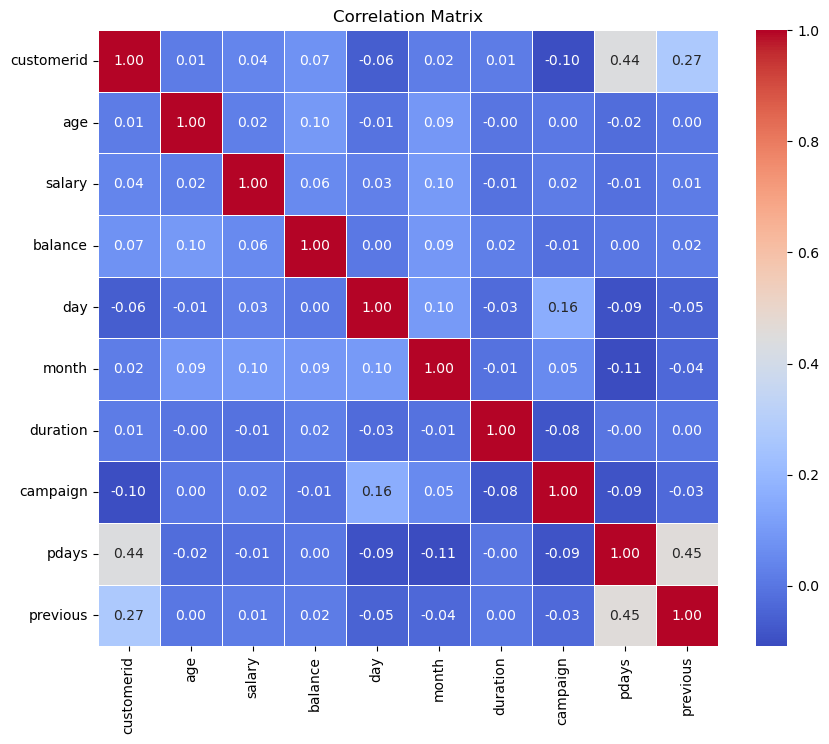

In [20]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

-  We can observe that there is no correlation between any numeric value column

## Analyzing the Data

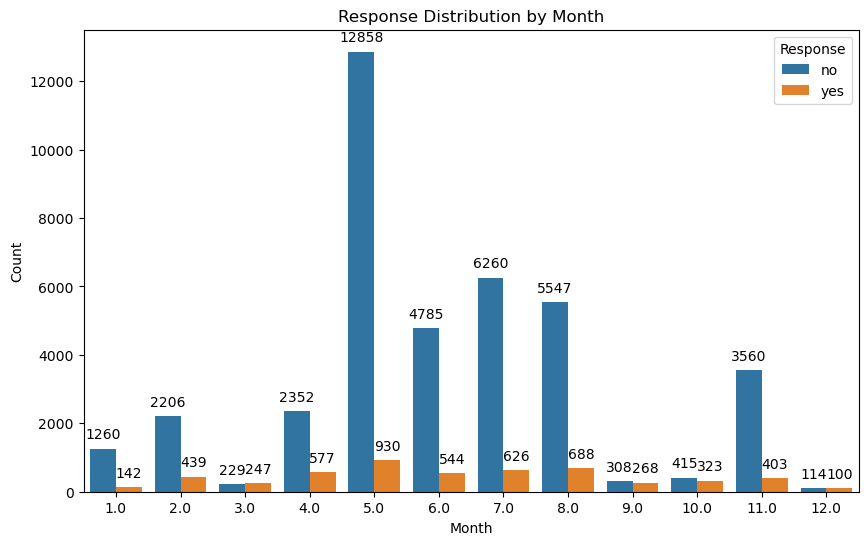

In [21]:
# Response Distribution by Month

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', hue='response', data=df)
plt.title('Response Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')

# Label each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()


-  Most of the responses are received in the mid of the year i.e. in the months of May, June, July and August getting 71.35% of the total responses.
-  However, the best month in terms of conversion value is March with 51.89% values followed by December with 46.72%.
-  Whereas in the month of May most responses are recorded but has the least conversion rate of 6.74%.

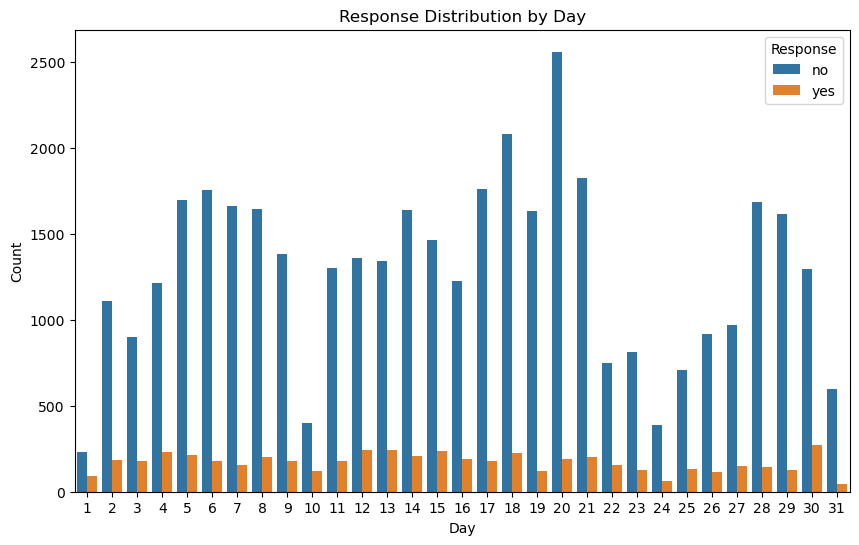

In [22]:
# Response Distribution by Day

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day', hue='response', data=df)
plt.title('Response Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')

-  The sine-like pattern could indicate seasonal variations in response rates. Certain days of the week or months may consistently have higher or lower response rates due to external factors such as holidays, weekends, or business cycles.

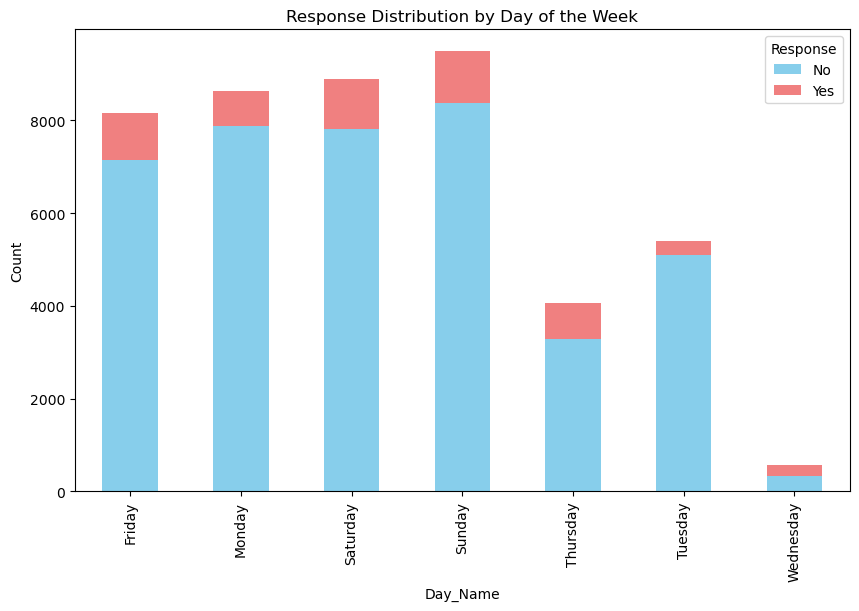

In [23]:
# Convert 'month' column to integer
df['month'] = df['month'].astype(int)

# Create a date column combining day and month
df['Date'] = pd.to_datetime(df[['day', 'month']].assign(year=2017))

# Extract the day of the week (Monday, Tuesday, etc.) from the date
df['Day_Name'] = df['Date'].dt.day_name()

# Map 'yes' to 1 and 'no' to 0 in the 'response' column
df['response_01'] = df['response'].map({'yes': 1, 'no': 0})

# Group by 'Day_Name' and 'response' and calculate the mean response rate
response_vs_day = df.groupby(['Day_Name', 'response_01']).size().unstack()

# Plot response vs. day of the week
response_vs_day.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.ylabel('Count')
plt.title('Response Distribution by Day of the Week')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

-  Weekend Effect: There may be a tendency for people to respond more to campaigns or outreach efforts on weekends (Saturday and Sunday). This could be because they have more leisure time or are more relaxed during weekends, making them more receptive to marketing messages.
-  Start and End of the Week: Monday and Friday, being the start and end of the traditional workweek for many people, respectively, could also be significant. Mondays might see increased responses as people return to work and check their messages, while Fridays might be a time when people are wrapping up tasks and catching up on any outstanding communications.

In [24]:
# Categorizing the age and salary columns into age groups and income groups respectively.

# Define income thresholds for categorization
income_bins = [0,10000,30000, 45000, 60000, 80000,100000, np.inf]
income_labels = ['<10000', '10000-30000', '30000-45000','45000-60000','60000-80000','80000-100000','>100000']

# Categorize 'salary' into income groups
df['income_group'] = pd.cut(df['salary'], bins=income_bins, labels=income_labels)

In [25]:
# Define age thresholds for categorization
age_bins = [0, 20, 30,45,60, np.inf]
age_labels = ['Student', '20-30','30-45','45-60','Senior']

# Categorize 'age' into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [26]:
df.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,previous,poutcome,response,job,education,Date,Day_Name,response_01,income_group,age_group
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,0,unknown,no,management,tertiary,2017-05-05,Friday,0,80000-100000,45-60
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,0,unknown,no,technician,secondary,2017-05-05,Friday,0,45000-60000,30-45
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,0,unknown,no,entrepreneur,secondary,2017-05-05,Friday,0,>100000,30-45
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,0,unknown,no,blue-collar,unknown,2017-05-05,Friday,0,10000-30000,45-60
4,5,33.0,0,1,single,no,no,no,no,unknown,...,0,unknown,no,unknown,unknown,2017-05-05,Friday,0,NaN,30-45


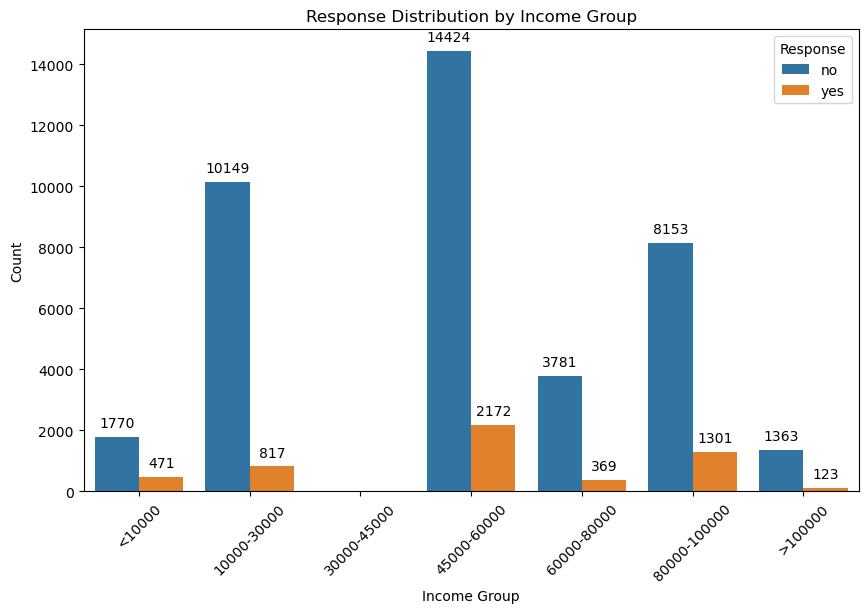

In [27]:
# Response Distribution by Income Group

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='income_group', hue='response', data=df)
plt.title('Response Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Label each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

-  
The response distribution by income group indicates that higher-income brackets, such as '45000-60000' and '>100000', tend to have higher proportions of 'yes' responses compared to lower-income groups like '<10000' and '10000-30000'. This suggests that individuals with higher incomes may be more receptive to the campaign.

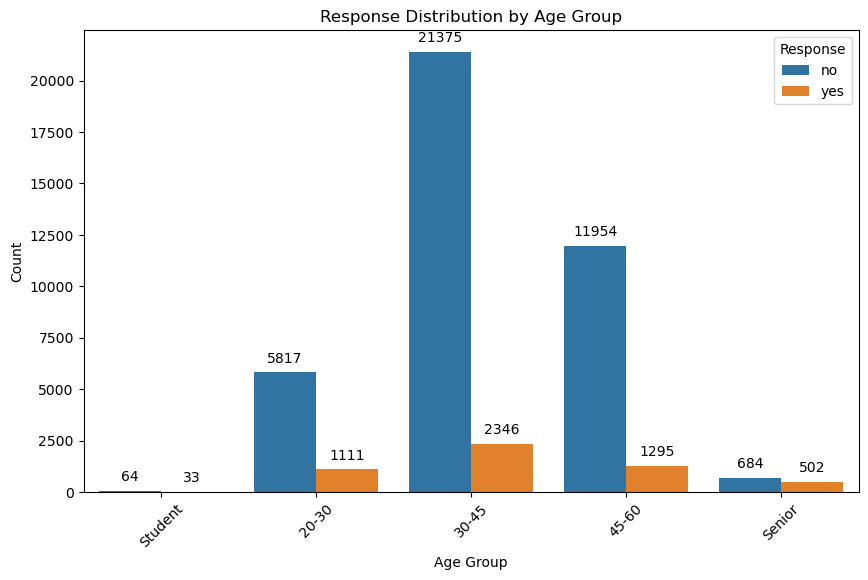

In [28]:
# Response Distribution by Age Group

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_group', hue='response', data=df)
plt.title('Response Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Label each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

-  
The response distribution by age group reveals that individuals in the '30-45' age bracket have the highest number of 'yes' responses, indicating a relatively positive response to the campaign. Meanwhile, 'Student' and 'Senior' age groups show a higher proportion of 'yes' responses compared to 'no' responses, suggesting that younger and older demographics may be more receptive to the campaign compared to middle-aged individuals. Additionally, the '20-30' and '45-60' age groups exhibit a more balanced distribution between 'yes' and 'no' responses, indicating mixed receptivity to the campaign within these age ranges.

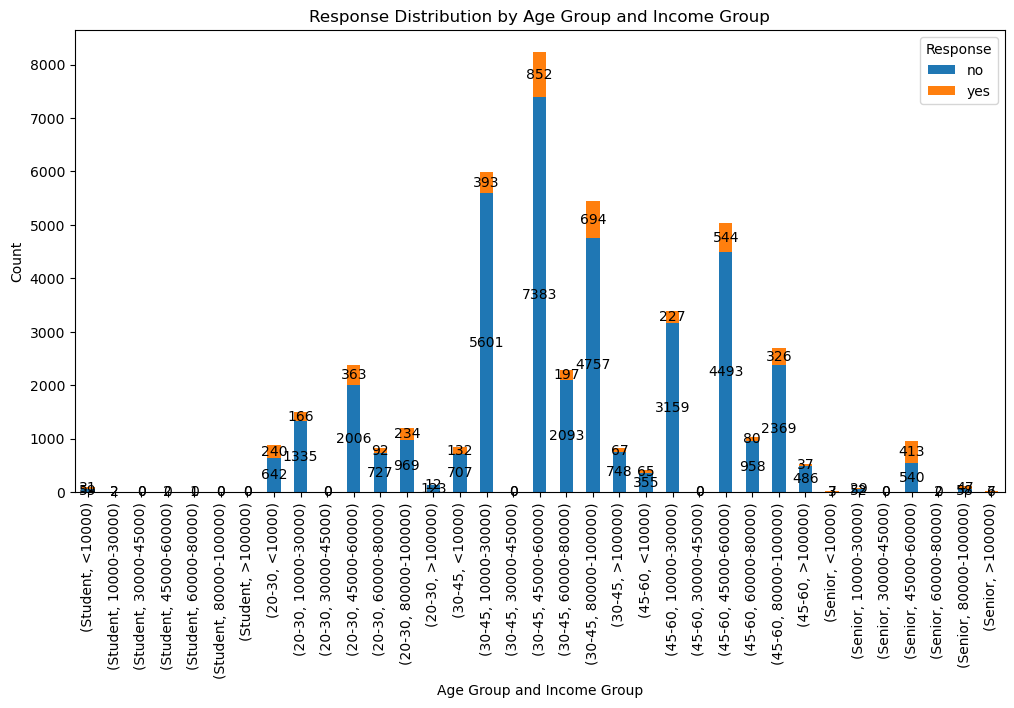

In [29]:
# Response Distribution by Age Group and Income Group

# Create a pivot table to aggregate data by age group, income group, and response
pivot_table = df.groupby(['age_group', 'income_group', 'response']).size().unstack(fill_value=0)

# Plot a stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Response Distribution by Age Group and Income Group')
plt.xlabel('Age Group and Income Group')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Response', loc='upper right')

# Label each segment with its count (without decimals)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


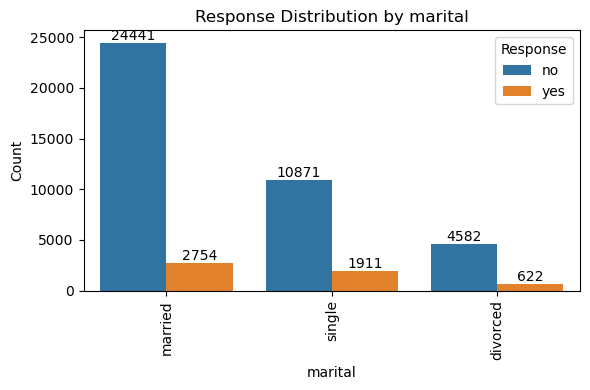

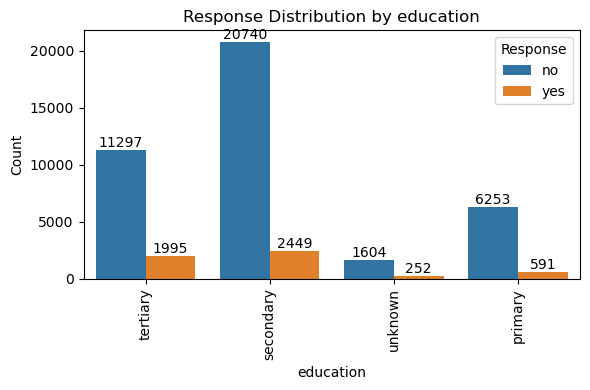

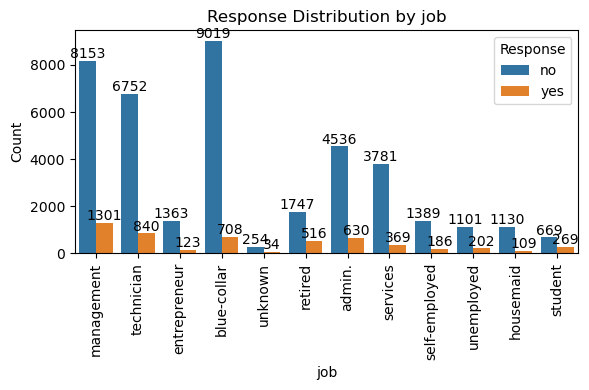

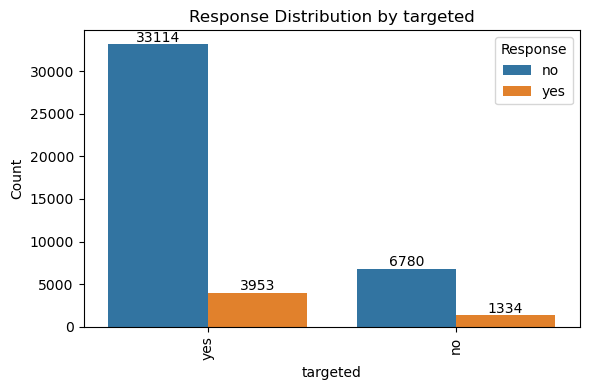

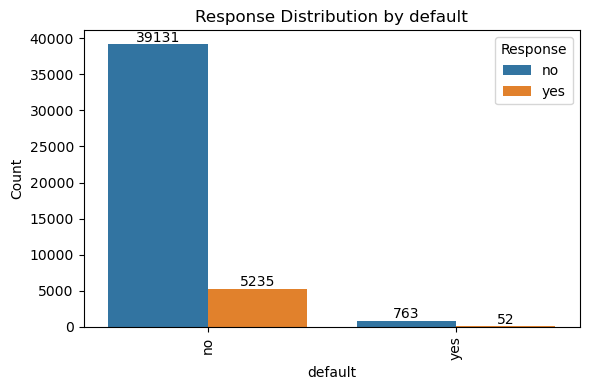

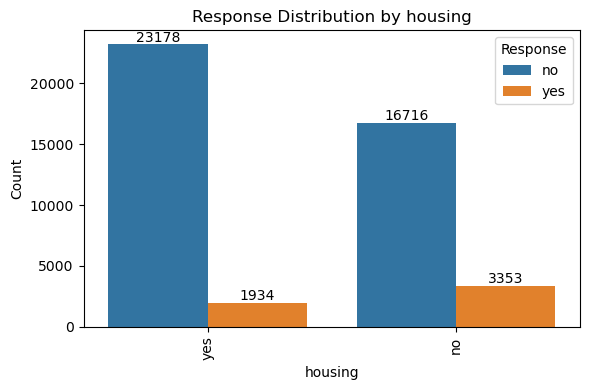

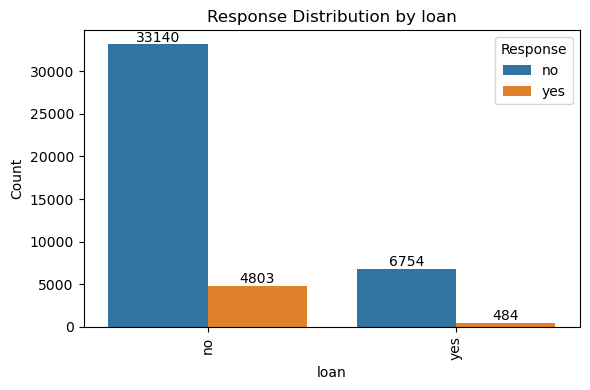

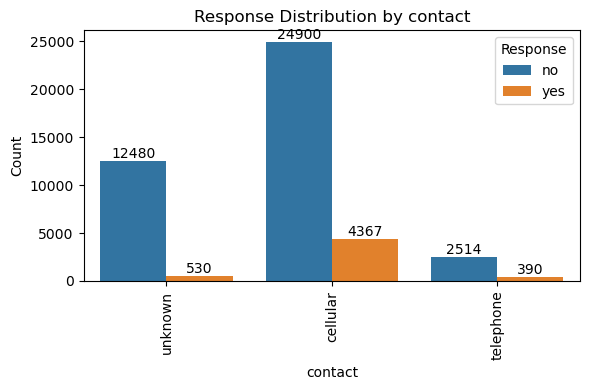

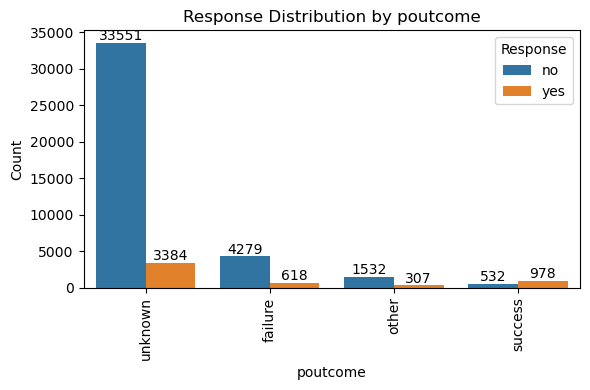

In [30]:
# Response Distribution by categorical columns

# List of categorical columns
categorical_cols = ['marital', 'education', 'job', 'targeted', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Create count plots for each categorical column individually
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, hue='response', data=df)
    plt.title(f'Response Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Response', loc='upper right')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    # Annotate bars with their counts
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

- Response distribution by marital status reveals that while the married segment exhibits the highest number of 'yes' responses, the single segment shows a higher proportion of 'yes' responses compared to 'no' responses.

- In the case of education, the secondary education segment records the highest number of 'yes' responses. However, the tertiary education segment demonstrates a higher proportion of 'yes' responses compared to 'no' responses.

-  Examining response distribution by job, the management segment tops the charts in terms of the number of 'yes' responses. Conversely, the student segment exhibits a higher proportion of 'yes' responses compared to 'no' responses.

-  Analysis of response distribution by targeted indicates that individuals who were targeted display a higher rate of 'yes' responses.

-  Regarding default status, individuals with no history of loan defaults show a higher rate of 'yes' responses.

-  In the housing loan category, respondents without any existing housing loans display a higher rate of 'yes' responses.

-  Similarly, individuals without any loans at all demonstrate a higher rate of 'yes' responses.

-  Examining response distribution by contact method, individuals contacted via cellular medium exhibit a better 'yes' response rate than those contacted via telephone.

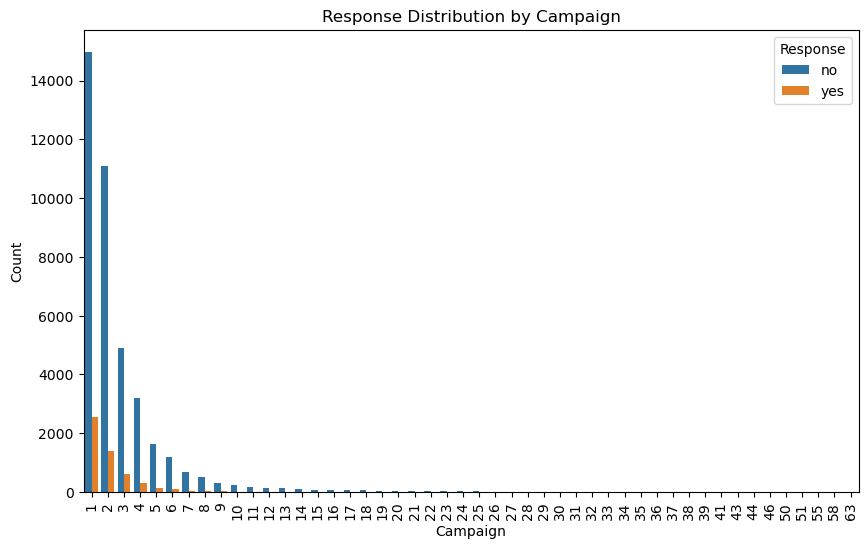

In [31]:
# Response Distribution by Campaign

plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='response', data=df)
plt.title('Response Distribution by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=90)
plt.show()

-  The descending response rates across campaigns suggest that earlier campaigns were more effective than later ones, possibly due to better strategies or targeting.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


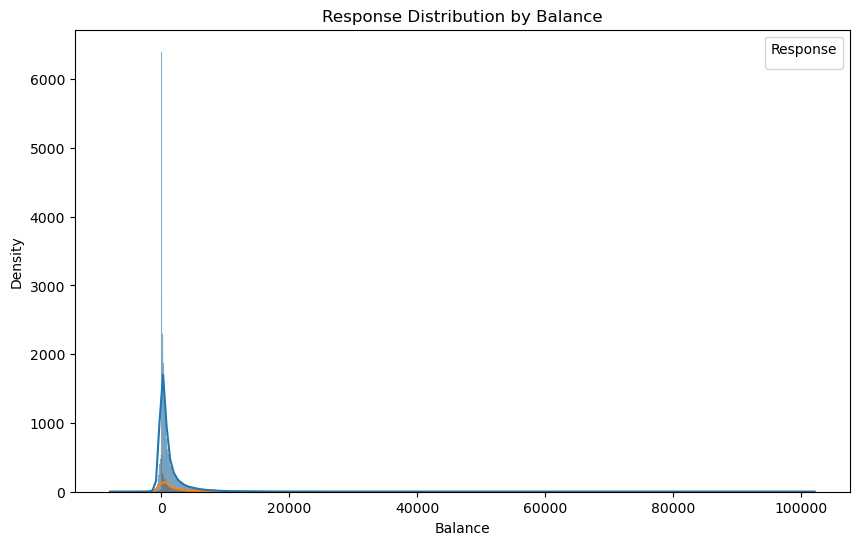

In [32]:
# Response Distribution by Balance
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', hue='response', kde=True)
plt.title('Response Distribution by Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend(title='Response', loc='upper right')
plt.show()

In [33]:
# Calculate the interquartile range (IQR)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds of the range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the range
print("Range where most points are concentrated:", lower_bound, "to", upper_bound)


Range where most points are concentrated: -1962.0 to 3462.0


-  The majority of balance values where the points are concentrated lie within the range of -1962.0 to 3462.0. This suggests that most customers have balance amounts within this range. However, it's important to note that the balance values vary widely, ranging from -8019 to 102127, indicating significant diversity in the financial statuses of customers.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


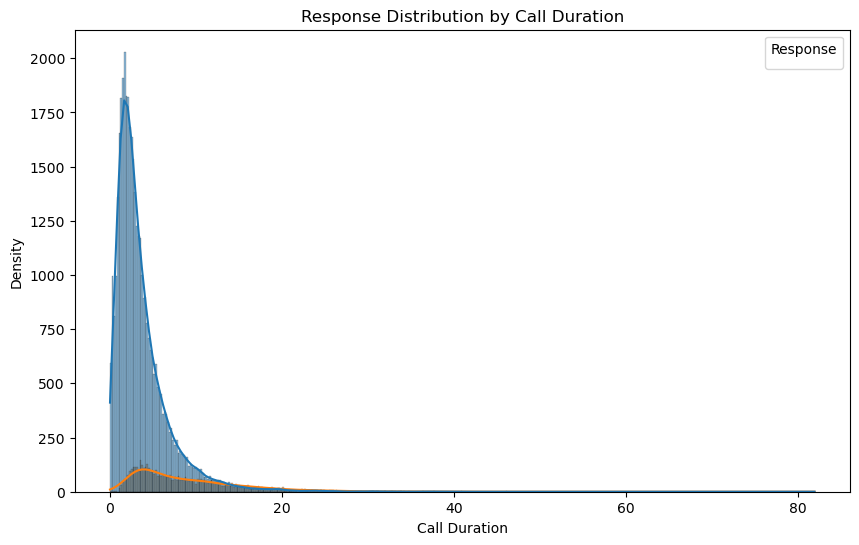

In [34]:
# Response Distribution by Call Duration

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', hue='response', kde=True)
plt.title('Response Distribution by Call Duration')
plt.xlabel('Call Duration')
plt.ylabel('Density')
plt.legend(title='Response', loc='upper right')
plt.show()

In [35]:
# Calculate the interquartile range (IQR)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds of the range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the range
print("Range where most points are concentrated:", lower_bound, "to", upper_bound)

Range where most points are concentrated: -3.683333333333325 to 10.716666666666661


In [36]:
# Finding the best combination with the most probability to response 'yes'.

# Group the data by the specified attributes and calculate the response probability
response_prob = df.groupby(['income_group', 'age_group', 'marital', 'education', 'job']).apply(lambda x: (x['response'] == 'yes').mean()).reset_index(name='response_probability')

# Display the response probability for each combination of attributes
print(response_prob)

    income_group age_group   marital  education           job  \
0         <10000   Student   married    unknown       student   
1         <10000   Student    single    primary       student   
2         <10000   Student    single  secondary       student   
3         <10000   Student    single   tertiary       student   
4         <10000   Student    single    unknown       student   
..           ...       ...       ...        ...           ...   
405      >100000     45-60    single    unknown  entrepreneur   
406      >100000    Senior  divorced  secondary  entrepreneur   
407      >100000    Senior   married    primary  entrepreneur   
408      >100000    Senior   married  secondary  entrepreneur   
409      >100000    Senior   married   tertiary  entrepreneur   

     response_probability  
0                0.500000  
1                0.352941  
2                0.282051  
3                0.000000  
4                0.448276  
..                    ...  
405              0.0000

In [37]:
response_prob_sorted = response_prob.sort_values(by='response_probability', ascending=False)
response_prob_sorted.head(5)

,income_group,age_group,marital,education,job,response_probability
47,<10000,45-60,divorced,unknown,unemployed,1.0
145,45000-60000,20-30,divorced,tertiary,admin.,1.0
269,45000-60000,Senior,divorced,secondary,self-employed,1.0
270,45000-60000,Senior,divorced,secondary,technician,1.0
131,10000-30000,Senior,divorced,secondary,housemaid,1.0


In [38]:
# Count the number of exact combinations
combination_counts = df.groupby(['income_group', 'age_group', 'marital', 'education', 'job']).size().reset_index(name='count')

# Display the combination counts
print(combination_counts)

     income_group age_group   marital education           job  count
0          <10000   Student  divorced   primary        admin.      0
1          <10000   Student  divorced   primary   blue-collar      0
2          <10000   Student  divorced   primary  entrepreneur      0
3          <10000   Student  divorced   primary     housemaid      0
4          <10000   Student  divorced   primary    management      0
...           ...       ...       ...       ...           ...    ...
5035      >100000    Senior    single   unknown      services      0
5036      >100000    Senior    single   unknown       student      0
5037      >100000    Senior    single   unknown    technician      0
5038      >100000    Senior    single   unknown    unemployed      0
5039      >100000    Senior    single   unknown       unknown      0

[5040 rows x 6 columns]


In [39]:
# Merge response_prob_sorted with combination_counts on the common columns
merged_df = pd.merge(response_prob_sorted, combination_counts, on=['income_group', 'age_group', 'marital', 'education', 'job'])

# Sort the merged DataFrame by 'response_probability' and 'count' columns
merged_df = merged_df.sort_values(by=['response_probability', 'count'], ascending=False)

# Display the sorted DataFrame
print(merged_df)

    income_group age_group   marital  education            job  \
5    45000-60000    Senior  divorced   tertiary  self-employed   
8        >100000    Senior   married  secondary   entrepreneur   
0         <10000     45-60  divorced    unknown     unemployed   
1    45000-60000     20-30  divorced   tertiary         admin.   
2    45000-60000    Senior  divorced  secondary  self-employed   
..           ...       ...       ...        ...            ...   
388  45000-60000     20-30  divorced    primary         admin.   
396  45000-60000     20-30    single    primary  self-employed   
405  60000-80000    Senior   married    unknown       services   
406  60000-80000    Senior   married    primary       services   
408  60000-80000     45-60    single   tertiary       services   

     response_probability  count  
5                     1.0      7  
8                     1.0      4  
0                     1.0      1  
1                     1.0      1  
2                     1.0      1

In [40]:
merged_df.head()

,income_group,age_group,marital,education,job,response_probability,count
5,45000-60000,Senior,divorced,tertiary,self-employed,1.0,7
8,>100000,Senior,married,secondary,entrepreneur,1.0,4
0,<10000,45-60,divorced,unknown,unemployed,1.0,1
1,45000-60000,20-30,divorced,tertiary,admin.,1.0,1
2,45000-60000,Senior,divorced,secondary,self-employed,1.0,1


The combination of the customer attributes that has the highest probability to response yes is:
-  Income group:45000-60000
-  age_group: Senior					
-  marital: divorced
-  education: tertiary
-  job: self-employed

This combination has a frequency of 7 in the dataset and all of the time they have responded 'yes'.

# Report Summary:

1. **Response Timing**

-    Most responses occur in the mid-year months of May, June, July, and August, comprising 71.35% of total responses.
-    March and December show the highest conversion rates, whereas May records the most responses but the lowest conversion rate of 6.74%.
    
2. **Seasonal Patterns**

-    Seasonal variations in response rates suggest potential influences of external factors like holidays or weekends.
-    Weekends (Saturday and Sunday) see higher response rates, possibly due to increased leisure time and receptivity to marketing messages.
    
3. **Day of the Week**

-    Monday and Friday may have higher response rates, likely due to people returning to work or wrapping up tasks.
-    The "weekend effect" and start/end of the workweek influence response rates.

4. **Response by Demographics**

-    Higher-income brackets and certain age groups show a higher proportion of 'yes' responses, indicating varied receptivity to the campaign.
-    Marital status, education level, occupation, and loan status also influence response rates.

5. **Campaign Effectiveness**

-    Earlier campaigns tend to have higher response rates compared to later ones, suggesting possible improvements in strategy or targeting over time.

6. **Balance Distribution**

-    Most customer balances fall within the range of -1962.0 to 3462.0, indicating a concentration of balances in this range but significant diversity overall.

7. **Key Combination**

-    The combination of income group '45000-60000', age group 'Senior', marital status 'divorced', education 'tertiary', and job 'self-employed' shows the highest probability of 'yes' responses.


These findings offer valuable insights for optimizing campaign strategies and targeting specific customer segments for higher response rates and conversion. Further analysis and targeted marketing efforts can leverage these insights to enhance campaign effectiveness and improve overall outcomes.

# Recommendations:

Based on the insights from the report, here are some recommendations for the bank:

1. **Target High-Income Individuals**: Focus marketing efforts on higher-income brackets, such as those earning between 45,000 and 60,000 or above 100,000, as they exhibit higher response rates.
2. **Segmented Campaigns by Age**: Tailor campaigns to different age groups, with special attention to individuals aged 30-45, students, and seniors, who show higher receptivity.
3. **Marital Status Awareness**: Acknowledge that while married individuals respond well, singles have a higher proportion of positive responses. Segment campaigns accordingly.
4. **Education-Based Targeting**: Recognize that individuals with secondary education respond well, but those with tertiary education have a higher proportion of positive responses. Adjust messaging to resonate with different educational backgrounds.
5. **Job Title Segmentation**: Continue targeting management roles, but also consider the student segment, which shows a higher proportion of positive responses.
6. **Loan and Default Analysis**: Utilize customer data on loan history and defaults to refine targeting. Individuals without a history of loan defaults or without any loans at all show higher response rates.
7. **Housing Loan Consideration**: Recognize that individuals without existing housing loans display higher response rates.
8. **Campaign Timing Optimization**: Optimize campaign timing based on historical response patterns, with a focus on mid-year months (June to August) and avoiding May, which has lower conversion rates.
9. **Weekend Campaigns**: Consider launching campaigns over weekends (Saturday and Sunday), and focus on Mondays and Fridays for increased responses.
10. **Continuous Monitoring and Adaptation**: Regularly monitor campaign performance metrics and customer feedback to adapt strategies accordingly, ensuring ongoing optimization and effectiveness.


By implementing these recommendations, the bank can enhance its marketing campaigns, improve response rates, and ultimately achieve greater success in customer acquisition and engagement.